In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

import tensorflow as tf

tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'

df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [2]:
df.head(10)

NameError: name 'df' is not defined

In [ ]:
df.info()

In [5]:
df.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
count,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,13204962.0,...,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,13204962.0,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.998311e+03,3.068508e+01,1.885861e+00,1.793400e-01,3.978579e-01
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,1.726202e+03,1.957339e+01,1.409635e+00,1.443981e+00,4.894558e-01
min,1.220312e+01,2.029688e+01,-2.650000e+01,-3.300781e+00,1.999512e-01,3.798828e-01,0.000000e+00,2.170312e+01,-1.372656e+01,0.0,...,-3.500000e+01,-1.669922e+00,-1.054400e+04,-1.330078e+00,-1551.0,2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00
25%,2.800000e+01,2.800000e+01,3.000488e-01,0.000000e+00,1.606250e+01,1.876562e+01,2.570312e+00,1.370000e+02,6.081250e+01,1211.0,...,-1.000000e+00,3.909375e+01,-1.375000e+02,-2.000427e-02,879.0,1.529000e+03,1.300000e+01,1.000000e+00,-1.000000e+00,0.000000e+00
50%,2.809375e+01,2.809375e+01,7.998047e-01,0.000000e+00,1.856250e+01,2.131250e+01,7.570312e+00,1.512500e+02,6.856250e+01,2234.0,...,9.500000e+00,8.600000e+01,-8.798828e-01,-0.000000e+00,2118.0,2.980000e+03,3.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00
75%,2.809375e+01,2.809375e+01,1.500000e+00,9.997559e-02,2.123438e+01,2.323438e+01,9.421875e+00,1.646250e+02,7.137500e+01,2452.0,...,1.779688e+01,1.029375e+02,9.606250e+01,2.999878e-02,3570.0,4.449000e+03,4.700000e+01,3.000000e+00,1.000000e+00,1.000000e+00
max,3.000000e+01,3.170312e+01,6.350000e+01,3.300781e+00,2.400000e+01,2.400000e+01,1.701562e+01,2.117500e+02,1.000000e+02,2950.0,...,4.018750e+01,1.645000e+02,4.480000e+03,2.390625e+00,14544.0,6.083000e+03,6.900000e+01,4.000000e+00,2.000000e+00,1.000000e+00


In [6]:
df_visual= df.head(5000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

C:\Users\47008\AppData\Local\Temp/ipykernel_9212/519855737.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


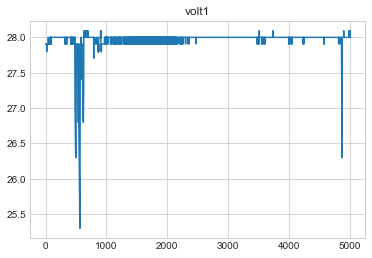

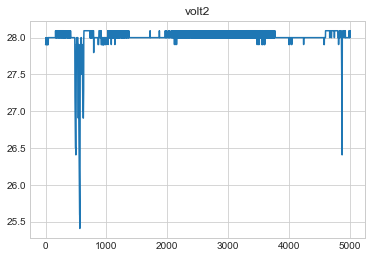

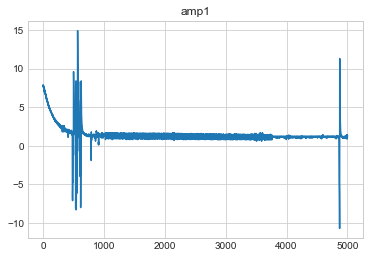

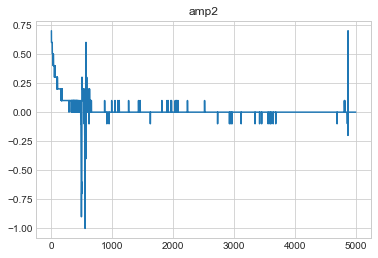

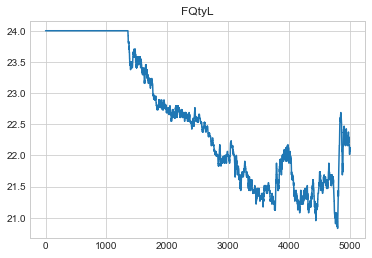

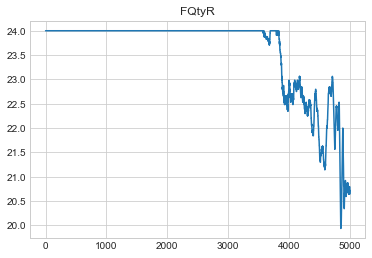

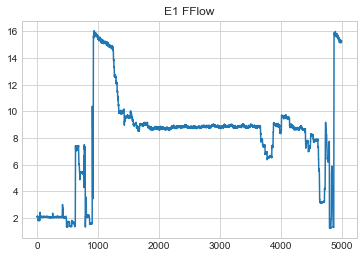

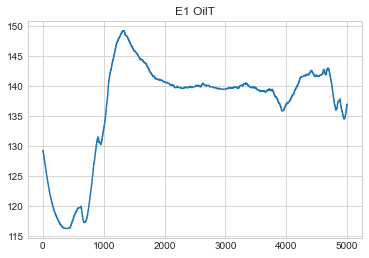

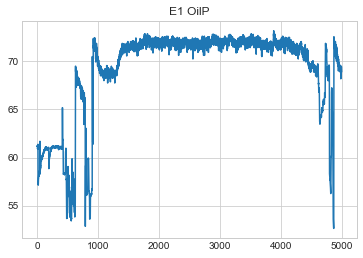

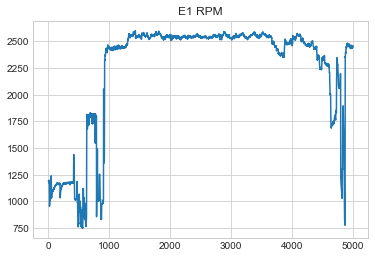

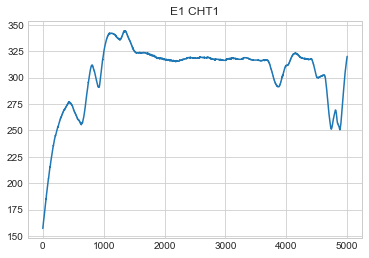

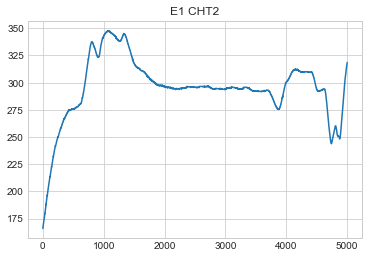

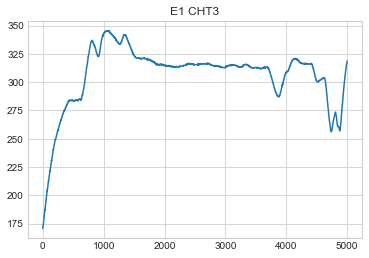

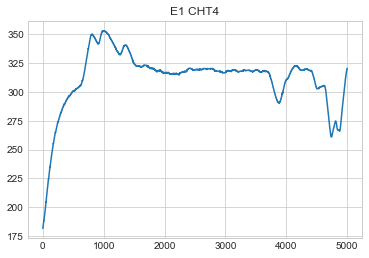

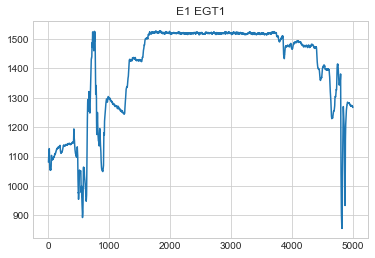

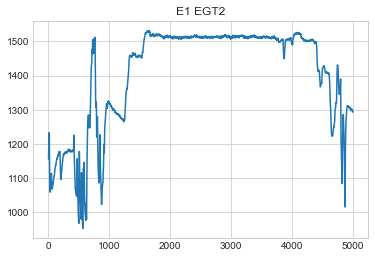

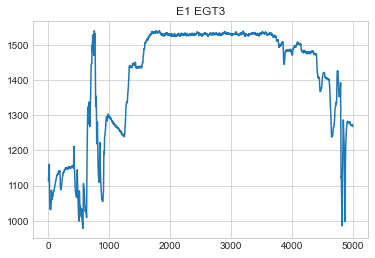

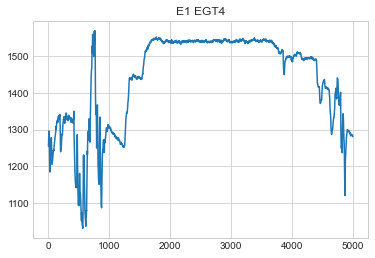

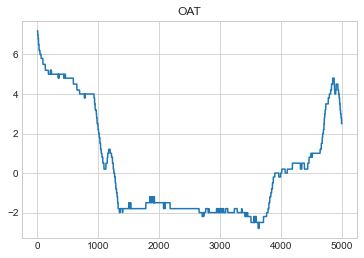

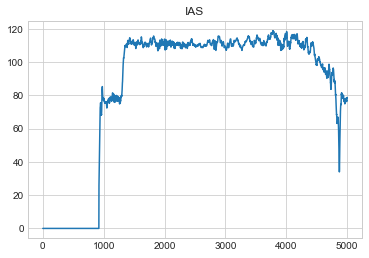

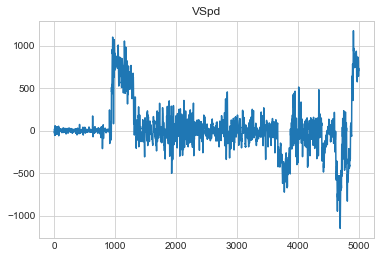

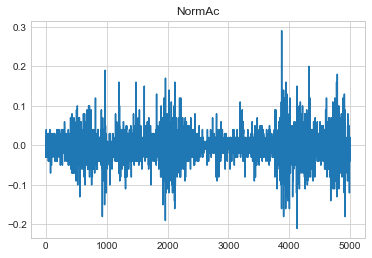

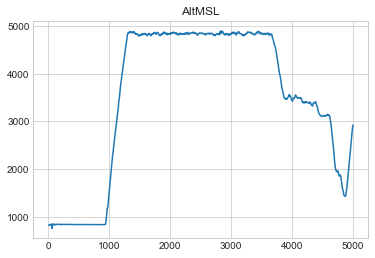

In [7]:
for col in df_visual.columns:
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    plt.title(col)

    x = np.linspace(0, df_visual.shape[0])
    ax.plot(df_visual[col])

In [8]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             318
      1             224
1     0             246
      1             171
2     0             323
      1             252
3     0             256
      1             162
4     0             270
      1             167

In [9]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

In [10]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 10
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 100

In [11]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

C:\Users\47008\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [12]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [13]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [14]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [15]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [16]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [17]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [18]:
def conv_model(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 3, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 3, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model                      

In [19]:
cnn_result = {}
for i in range(NFOLD-1):   
    model= conv_model()
    model.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.AUC(curve = 'PR')], 
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_cnn = model.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_result[i] = res_cnn.history
    
pd.DataFrame(cnn_result)

Epoch 1/10
100/100 [==============================] - 29s 284ms/step - loss: 0.2458 - root_mean_squared_error: 0.4958 - auc: 1.0000 - val_loss: 0.2530 - val_root_mean_squared_error: 0.5030 - val_auc: 0.4418
Epoch 2/10
100/100 [==============================] - 29s 287ms/step - loss: 0.2109 - root_mean_squared_error: 0.4593 - auc: 1.0000 - val_loss: 0.2642 - val_root_mean_squared_error: 0.5140 - val_auc: 0.4221
Epoch 3/10
100/100 [==============================] - 29s 295ms/step - loss: 0.1566 - root_mean_squared_error: 0.3957 - auc: 1.0000 - val_loss: 0.2956 - val_root_mean_squared_error: 0.5437 - val_auc: 0.4294
Epoch 4/10
100/100 [==============================] - 29s 291ms/step - loss: 0.0862 - root_mean_squared_error: 0.2936 - auc: 1.0000 - val_loss: 0.3687 - val_root_mean_squared_error: 0.6072 - val_auc: 0.4404
Epoch 5/10
100/100 [==============================] - 29s 292ms/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - auc: 1.0000 - val_loss: 0.4297 - val_root_mean_squar

100/100 [==============================] - 31s 311ms/step - loss: 0.0092 - root_mean_squared_error: 0.0957 - auc_3: 1.0000 - val_loss: 0.5822 - val_root_mean_squared_error: 0.7630 - val_auc_3: 0.3853


,0,1,2,3
loss,"[0.24581515789031982, 0.21094834804534912, 0.1...","[0.21829353272914886, 0.15736116468906403, 0.0...","[0.21287645399570465, 0.15838494896888733, 0.0...","[0.20887252688407898, 0.14362654089927673, 0.0..."
root_mean_squared_error,"[0.4957974851131439, 0.45929113030433655, 0.39...","[0.46721893548965454, 0.39668774604797363, 0.2...","[0.4613853693008423, 0.3979760706424713, 0.307...","[0.4570257365703583, 0.37898093461990356, 0.26..."
auc,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN,NaN
val_loss,"[0.25301823019981384, 0.26424193382263184, 0.2...","[0.26381033658981323, 0.30224865674972534, 0.3...","[0.25905391573905945, 0.28347402811050415, 0.3...","[0.2757622301578522, 0.3266875147819519, 0.423..."
val_root_mean_squared_error,"[0.5030092000961304, 0.5140447020530701, 0.543...","[0.5136247277259827, 0.5497714877128601, 0.619...","[0.5089734196662903, 0.5324227809906006, 0.581...","[0.5251306891441345, 0.5715658664703369, 0.651..."
val_auc,"[0.44175270199775696, 0.42205193638801575, 0.4...",NaN,NaN,NaN
auc_1,NaN,"[1.0, 1.0, 0.9999999403953552, 1.0, 1.0, 1.0, ...",NaN,NaN
val_auc_1,NaN,"[0.4418831467628479, 0.43292129039764404, 0.39...",NaN,NaN
auc_2,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.000...",NaN
val_auc_2,NaN,NaN,"[0.4977130889892578, 0.4481874704360962, 0.478...",NaN


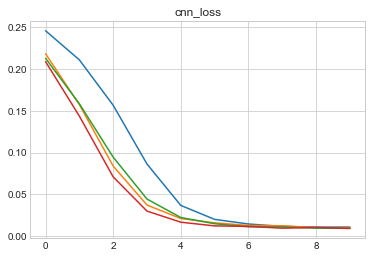

In [20]:
plt.title('cnn_loss')
for i in range(4):
    plt.plot(cnn_result[i]['loss'])

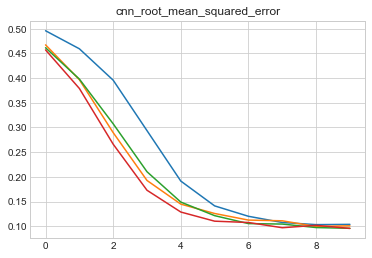

In [21]:
plt.title("cnn_root_mean_squared_error")
for i in range(4):
    plt.plot(cnn_result[i]['root_mean_squared_error'])

In [22]:
y_pred_cnn = model.predict(test_dataset, verbose = True)

13/13 [==============================] - 1s 60ms/step


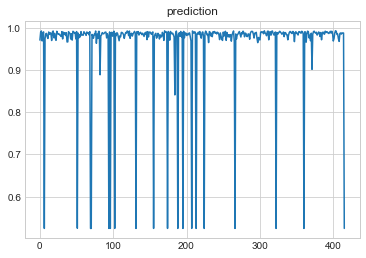

In [23]:
plt.title("prediction")
plt.plot(y_pred_cnn)